## 2.1) Import the libraries

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Off FutureWarnings
import warnings
warnings.filterwarnings('ignore')

# Resampling
from imblearn.over_sampling import SMOTENC
from sklearn.utils import class_weight

# Dimension Reducing
from sklearn.decomposition import PCA

# Preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Model Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

# Model Saver
import pickle

## 2.2) Upload DataFrame as df

In [2]:
df = pd.read_csv("ai4i2020.csv")
pd.options.mode.chained_assignment = None

In [3]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


## 2.3) Check if exist duplicate values

In [4]:
# Verify if the data has duplicated values
duplicates = df.duplicated().sum()
print("Total duplicated values:", duplicates)

Total duplicated values: 0


## 2.4) Check if exist missing values

In [5]:
# Check for missing or Null values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## 2.5) Verify the data structure

In [6]:
# dataset description
df.describe(include='all')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


## 2.6) Describe numeric features

In [7]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## 2.7) Verify “Target” column distribution

In [9]:
# Verify the proportion of column "Target"
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [10]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [11]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [12]:
# Transforming One Hot Encoding into one column (Failure Type)

def get_failure_type(row):
    if row['TWF'] == 1:
        return 'Tool Wear Failure'
    elif row['HDF'] == 1:
        return 'Heat Dissipation Failure'
    elif row['PWF'] == 1:
        return 'Power Failure'
    elif row['OSF'] == 1:
        return 'Overstrain Failure'
    elif row['RNF'] == 1:
        return 'Random Failure'
    else:
        return 'No Failure'

# Apply the function to each row to create the 'Failure Type' column
df['Failure Type'] = df.apply(get_failure_type, axis=1)

df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [13]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [14]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'Failure Type'],
      dtype='object')

## 2.8) Verify “Failure Type” distribution

In [15]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     115
Power Failure                 91
Overstrain Failure            78
Tool Wear Failure             46
Random Failure                18
Name: count, dtype: int64

# 3) Data Preparation

## 3.1) Rename the columns

In [16]:
rename_columns = {
    'UDI': 'ID',
    'Air temperature [K]': 'Air_temperature',
    'Process temperature [K]': 'Process_temperature',
    'Rotational speed [rpm]': 'Rotational_speed',
    'Torque [Nm]': 'Torque',
    'Tool wear [min]': 'Tool_wear',
    'Product ID': 'Product_ID',
    'Failure Type': 'Failure_type',
    'Machine failure': 'Target',
}

df.rename(rename_columns, axis=1, inplace=True)

In [17]:
df.head(5)

,ID,Product_ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## 3.2) Identify redundance rows

In [18]:
# Analysing redundance value, count failures on "Target" column
count_failures = (df['Target'] == 1).sum()
print('Number of failures:', count_failures)

Number of failures: 339


In [19]:
# Sum of occurrences of 'Failure_type' other than 'No Failure'
sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['Target'] == 1), 'Failure_type'].count()
print('Sum of failures different of "No Failure":', sum_failures)

Sum of failures different of "No Failure": 330


## 3.3) Remove redundance rows

In [20]:
# Filter the rows with has 1 in the column "Target" and "No Failure" in the column 'Failure_type'
rows_to_remove = df[(df['Target'] == 1) & (df['Failure_type'] == 'No Failure')]
# Remove this filtered row in the main df
df.drop(rows_to_remove.index, inplace=True)

## 3.4) Remove unnecessary columns

In [21]:
# Removing unnecessary columns
drop_columns = ['ID', 'Product_ID', 'Target']
df.drop(drop_columns, axis=1, inplace=True)

## 3.5) Remove “Random Failures”

In [22]:
# Removing "Random Failures" of the "Failure_type" column.
df = df.loc[df['Failure_type'] != 'Random Failures']

## 3.6) Rename classes of “Type” column

In [23]:
## Renaming the classes
rename_type = {
    'L': 'Low',
    'M': 'Medium',
    'H': 'High',
}

df['Type'].replace(rename_type, inplace=True)

## 3.7) Plot “Type” distribution

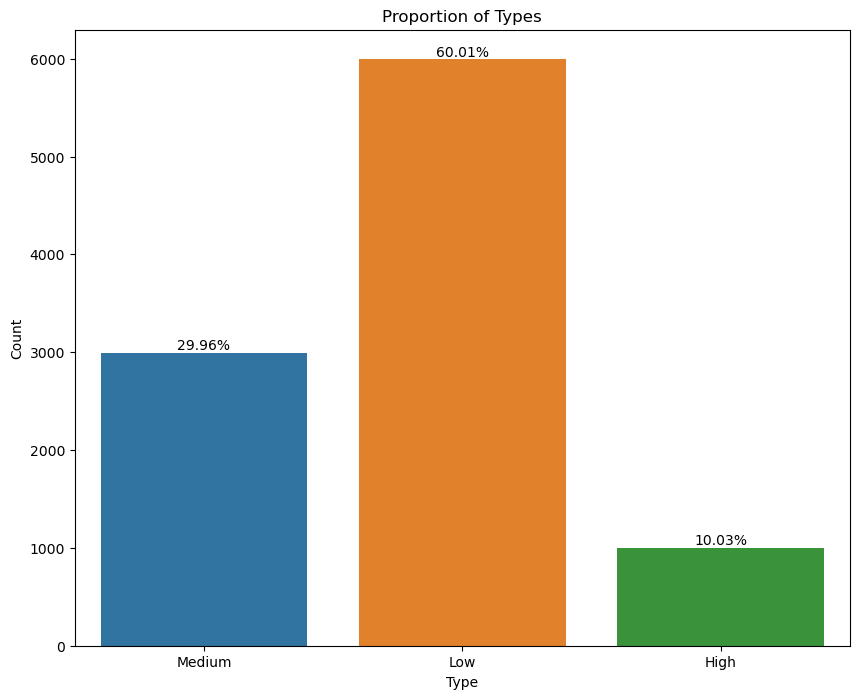

In [24]:
# Count types
type_plot = df.Type.value_counts()

# Plotting
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, x='Type')
plt.title('Proportion of Types')
plt.xlabel('Type')
plt.ylabel('Count')

# Add as percentages as labels
total = len(df.Type)
for p in ax.patches:
    height = p.get_height()
    percentage = (height/total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
               ha='center', va='bottom')
    
# Show the plot
plt.show()

## 3.8) Plot “Failure_type” distribution

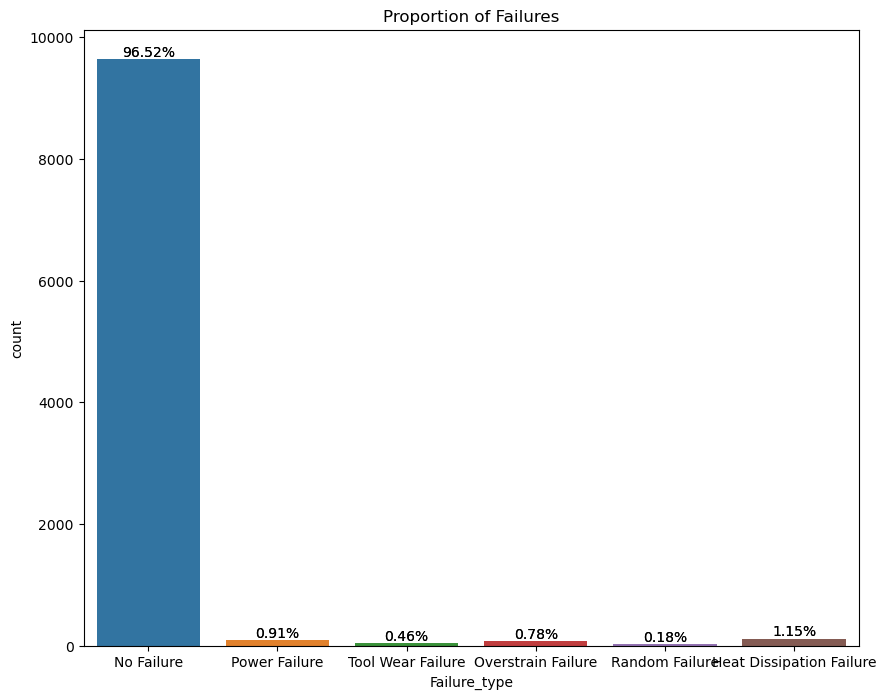

In [25]:
# Count types
type_plot2 = df['Failure_type'].value_counts()

# Plot bar graphic
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, x='Failure_type')
plt.title('Proportion of Failures')
plt.xlabel('Type')
plt.ylabel('Count')
ax = sns.countplot(data=df, x='Failure_type')

# Add as percentage as labels
total = len(df['Failure_type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height/total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),
               ha='center', va='bottom')
    
# Show plot
plt.show()

## 3.9) Plot histogram and boxplot with numeric features

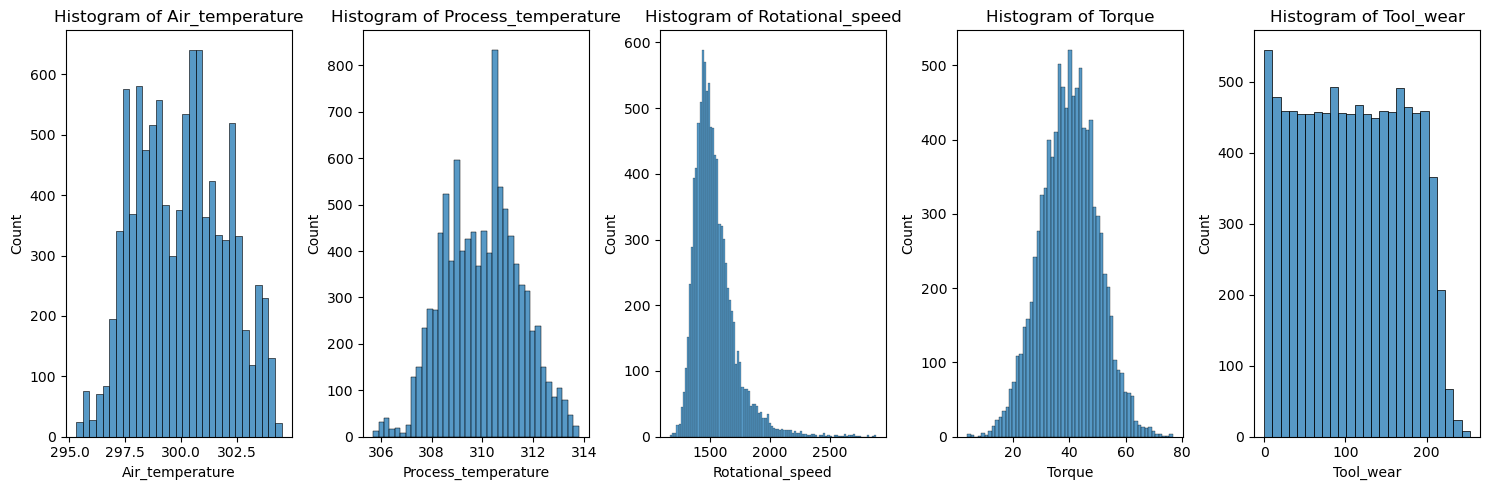

In [26]:
numerical_features = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
categorical_features = ['Type']

# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15,5))

# Plot histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')

# Adjust subplot
plt.tight_layout()

# Show histogram
plt.show()   

- These following colunns which are Air_temperature, Process_temperature, Torque follow the normal distribution. 
- Rotation_speed is assimetric with negative bias. (right skew)

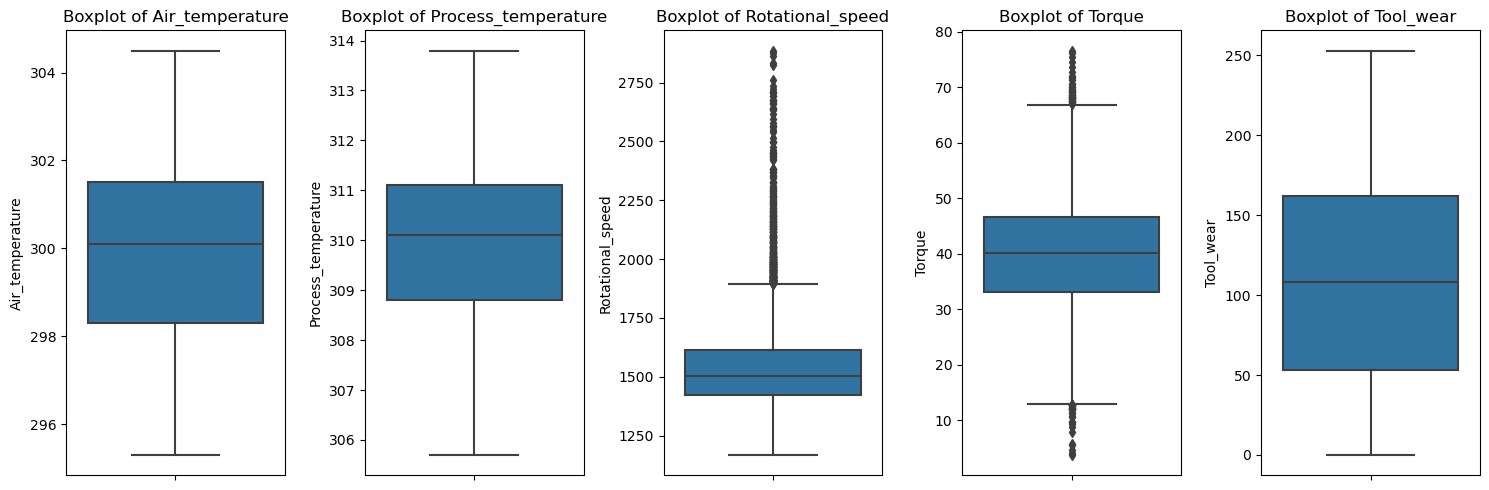

In [27]:
# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15,5))

# Plot boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Adjust subplot
plt.tight_layout()

# Show histogram
plt.show()   

- Rotational_speed tends to have the highest number of outliers comparing the rest.
- Torque also tends to have outliers too.

## 3.10) Plot distribution just of failures

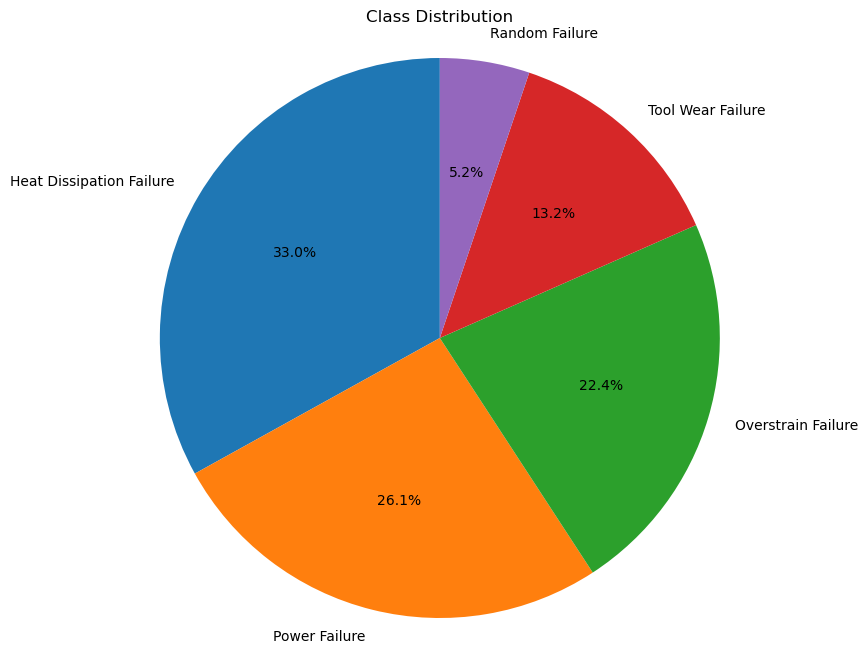

In [28]:
df_failure_type = df.loc[df['Failure_type'] != 'No Failure']

# Checking the balance of the class
proportions = df_failure_type['Failure_type'].value_counts(normalize=True)

# Plotting
plt.figure(figsize=(10,8))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

## 3.11) Plot numeric correlation with heatmap

<Axes: >

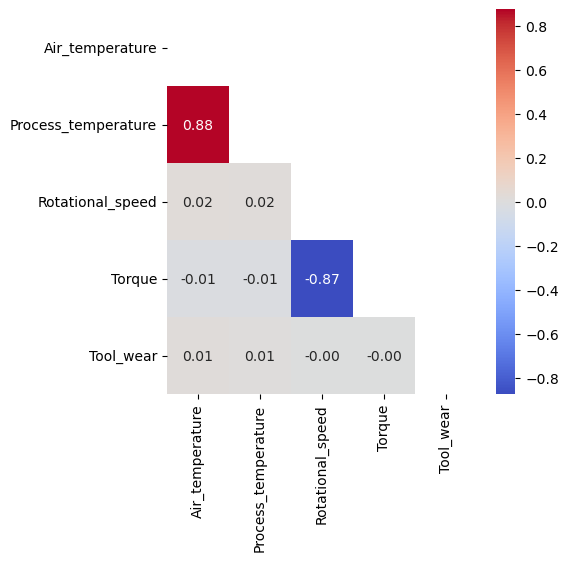

In [29]:
# Plot correlation of numeric values applying mask
df_feature = df[['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']]
corr = df_feature.corr()
plt.figure(figsize = (5,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, mask=mask, cmap='coolwarm', fmt='.2f')

## 3.12) Scale numerical features and apply OneHotEncoder for categoric features

In [30]:
# Create preprocessor ColumnTransformer to do OneHotEncoder for CATEGORICAL_FEATURES
# Define the pipelines for numeric and categorical transformations

num_pipeline = Pipeline([
    ('num_features', StandardScaler())
])
cat_pipeline = Pipeline([
    ('cat_featuresd', OneHotEncoder())
])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_pipeline, numerical_features),
    ('cat_trans', cat_pipeline, categorical_features)
])

# Fit and transform the data
df_transformed = preprocessor.fit_transform(df)

# Converting the transformed data back to a dataframe for easier visualization
# The transformed data will have new column names, especially for the one hot encoded categories
encoded_feature_names = preprocessor.named_transformers_['cat_trans'].get_feature_names_out(categorical_features)
new_column_names = list(numerical_features) + list(encoded_feature_names)
df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)
df_transformed.head(5)

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_High,Type_Low,Type_Medium
0,-0.952222,-0.947078,0.068015,0.282351,-1.695786,0.0,0.0,1.0
1,-0.902227,-0.879689,-0.729478,0.633456,-1.648656,0.0,1.0,0.0
2,-0.952222,-1.014468,-0.227559,0.944434,-1.617236,0.0,1.0,0.0
3,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816,0.0,1.0,0.0
4,-0.902227,-0.879689,-0.729478,0.001467,-1.554395,0.0,1.0,0.0


## 3.13) PCA Analysis

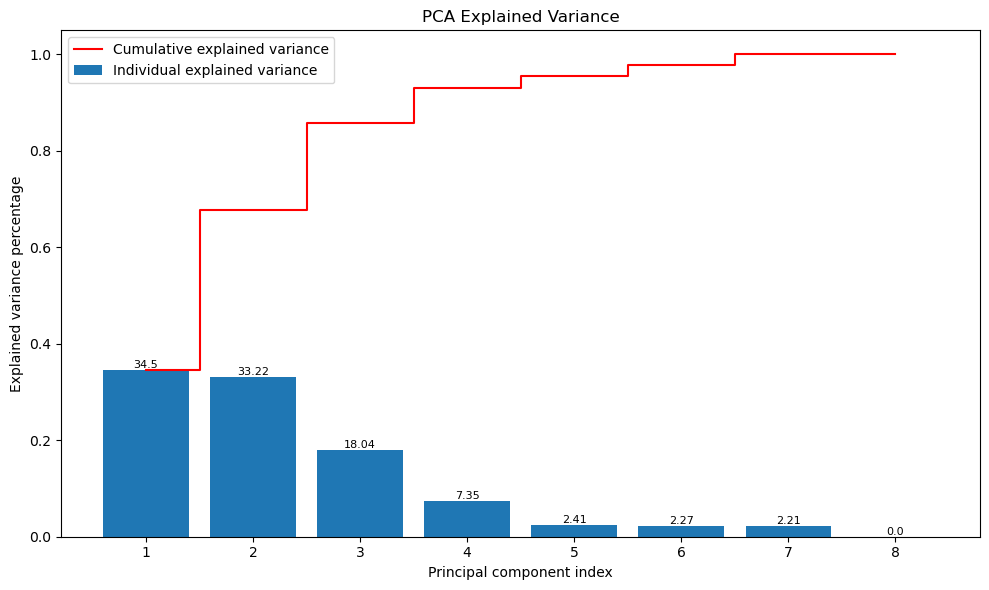

In [31]:
# Define PCA function
pca = PCA()
pca.fit(df_transformed)

# PCA Variance Explained
exp_var = pca.explained_variance_ratio_
cum_exp_var = exp_var.cumsum()

# Number of components
n_pca_components = len(exp_var)

# Create the graphic
plt.figure(figsize=(10,6))
bars = plt.bar(range(1, n_pca_components + 1), exp_var, align='center',
               label='Individual explained variance')
plt.step(range(1, n_pca_components + 1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

# Add labels in each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2),
             va='bottom', ha='center', fontsize=8)
    
# Adjust others elements of the graphic
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, n_pca_components + 1)))
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 3.14) Plot explanation of PCA components

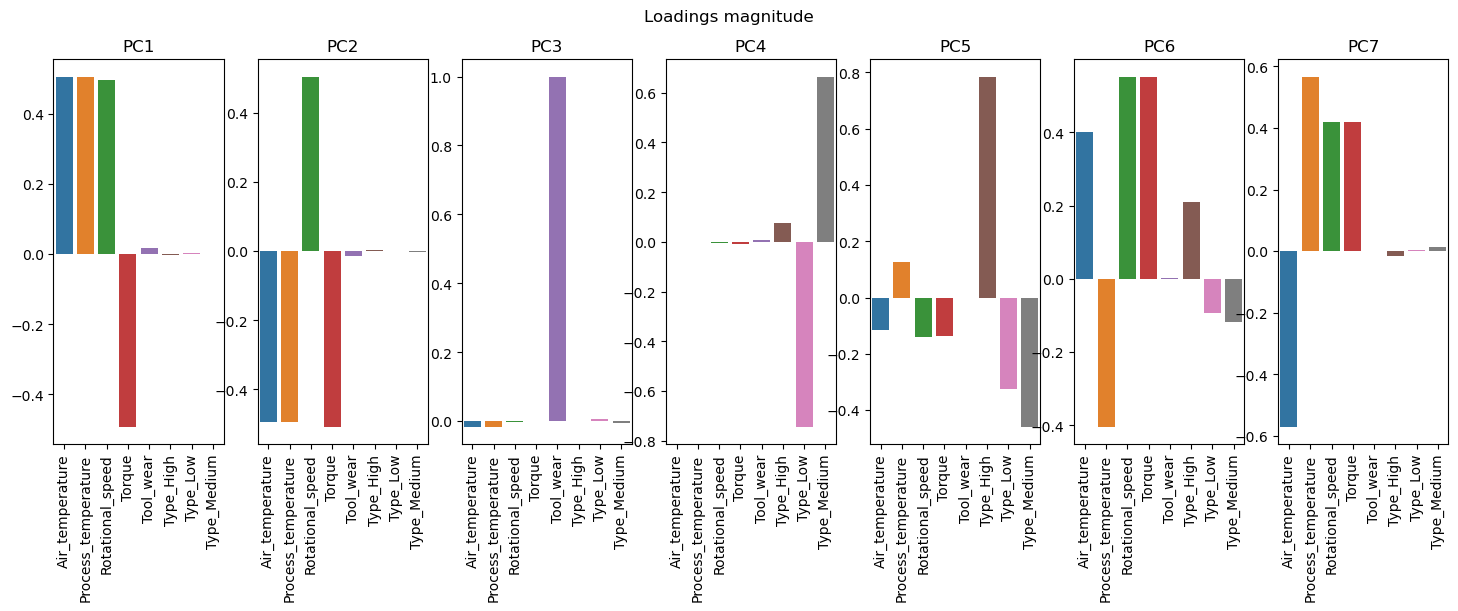

In [32]:
# PCA with 7 components to analyse what explain each component
pca7 = PCA(n_components=7)
x_pca7 = pd.DataFrame(data=pca7.fit_transform(df_transformed), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7'])

# Configure of the graphics
fig, axs = plt.subplots(ncols=7, figsize=(18,5))
fig.suptitle('Loadings magnitude')

all_features = numerical_features + list(encoded_feature_names)
pca_loadings = pd.DataFrame(data=pca7.components_, columns=all_features)

# Plot the bar graphics
for j in range(7):
    ax = axs[j]
    sns.barplot(ax=ax, x=pca_loadings.columns, y=pca_loadings.values[j])
    ax.tick_params(axis='x', rotation=90)
    ax.title.set_text('PC' + str(j+1))

# Plot the graph
plt.show()

# 4) Modeling

## 4.1) Create a function to get metrics

In [33]:
from sklearn.metrics import f1_score
def get_metrics(y_true, y_pred):
    dict_metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro F1': f1_score(y_true, y_pred, average='macro'),
        'F1 Scores per Class': f1_score(y_true, y_pred, average=None)
    }
    
    return dict_metrics

## 4.2) Separate dataset in train and test

In [34]:
df.head(5)

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_type
0,Medium,298.1,308.6,1551,42.8,0,No Failure
1,Low,298.2,308.7,1408,46.3,3,No Failure
2,Low,298.1,308.5,1498,49.4,5,No Failure
3,Low,298.2,308.6,1433,39.5,7,No Failure
4,Low,298.2,308.7,1408,40.0,9,No Failure


In [35]:
df_copy = df.copy()
X = df_copy[numerical_features + categorical_features]
Y = df_copy['Failure_type']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=69, test_size=0.3, stratify=Y)

## 4.3) Create model with PCA and class_weight

In [40]:
# Creating pipeline with PCA analysis and balanced class
pip_model_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=4)),
    ('model', RandomForestClassifier(random_state=69))
])

# Fit piepline with PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=Y_train)
pip_model_pca.fit(X_train, Y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
Y_pred = pip_model_pca.predict(X_test)

# Evaluate Metrics
metrics = get_metrics(Y_test, Y_pred)

# View Results
metrics

{'Accuracy': 0.9686457638425617,
 'Balanced Accuracy': 0.28018884622402146,
 'Macro Recall': 0.28018884622402146,
 'Macro Precision': 0.5257655924322591,
 'Macro F1': 0.3107732843677283,
 'F1 Scores per Class': array([0.10810811, 0.98465211, 0.53658537, 0.23529412, 0.        ,
        0.        ])}

## 4.4) Create model without PCA and with class_weight

In [41]:
# Creating pipeline with PCA analysis and balanced class
pip_model_no_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=69))
])

# Fit piepline with PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=Y_train)
pip_model_no_pca.fit(X_train, Y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
Y_pred = pip_model_no_pca.predict(X_test)

# Evaluate Metrics
metrics = get_metrics(Y_test, Y_pred)

# View Results
metrics

{'Accuracy': 0.9402935290193463,
 'Balanced Accuracy': 0.6666006688702321,
 'Macro Recall': 0.6666006688702321,
 'Macro Precision': 0.5119796279268807,
 'Macro F1': 0.5545227925984865,
 'F1 Scores per Class': array([0.80487805, 0.96870027, 0.72727273, 0.71428571, 0.        ,
        0.112     ])}

## 4.5) Create model without PCA and with SMOTE-NC

In [42]:
print(numerical_features + categorical_features)

['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear', 'Type']


In [43]:
# Get categorical feature indices for SMOTENC
categorical_features_indices = [i for i, 
                                feature in enumerate(numerical_features + categorical_features) 
                                if feature in categorical_features]

# Creating the new pipeline with SMOTENC using ImbPipeline
pip_model_smotenc = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotenc', SMOTENC(categorical_features=categorical_features_indices, random_state=69)),
    ('model', GradientBoostingClassifier(random_state=2023)) 
])
    
# Fit the pipeline
pip_model_smotenc.fit(X_train, Y_train)

# Generate Predictions
Y_pred = pip_model_smotenc.predict(X_test)

# Evaluate Metrics
metrics = get_metrics(Y_test, Y_pred)

# View Results
metrics

{'Accuracy': 0.92895263509006,
 'Balanced Accuracy': 0.6887661936118011,
 'Macro Recall': 0.6887661936118011,
 'Macro Precision': 0.496153532944102,
 'Macro F1': 0.5527948226470191,
 'F1 Scores per Class': array([0.80952381, 0.96258019, 0.68852459, 0.73333333, 0.        ,
        0.12280702])}

## 4.6) GridSearchCV to find better model

In [44]:
# Creating pipeline without PCA analysis and balanced class with parameter by model
pip_model_no_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023))
])

# Fit pipeline with sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=Y_train)
pip_model_no_pca.fit(X_train, Y_train, model__sample_weight=weights)

# Updated parameters for GridSearchCV
params = {
    'model': [
        LogisticRegressionCV(max_iter=500, random_state=69),
        RandomForestClassifier(random_state=69),
        GradientBoostingClassifier(random_state=69),
        DummyClassifier()
    ],
}

# Running GridSearchCV
grid = GridSearchCV(pip_model_no_pca, params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_train, Y_train)

# Collecting and printing the results
results = pd.DataFrame(grid.cv_results_)
best_model_index = results['mean_test_score'].idxmax()
best_model_params = results.loc[best_model_index, 'params']

# View results
print(f'Best model: {best_model_params}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best model: {'model': GradientBoostingClassifier(random_state=69)}


## 4.7) Tunnning the model

In [45]:
# New parameters for fine-tuning the GradientBoostingClassifier
fine_tune_params = {
    'model__n_estimators': [50, 100, 200, 300, 400, 500],
    'model__max_depth': [None, 5, 10, 15, 20]
}

# Running a new GridSearchCV for fine-tuning
fine_tune_grid = GridSearchCV(pip_model_no_pca, fine_tune_params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
fine_tune_grid.fit(X_train, Y_train)

# Collecting and printing the fine-tuned results
fine_tuned_results = pd.DataFrame(fine_tune_grid.cv_results_)
fine_tuned_best_index = fine_tuned_results['mean_test_score'].idxmax()
fine_tuned_best_params = fine_tuned_results.loc[fine_tuned_best_index, 'params']

# Print best model parameters
print(f"Best fine-tuned model parameters: {fine_tuned_best_params}")

# Finding the best estimator parameters
tuned_model = fine_tune_grid.best_estimator_
Y_pred = tuned_model.predict(X_test)

# View new performance (focus on F1-Score)
get_metrics(Y_test, Y_pred)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best fine-tuned model parameters: {'model__max_depth': 5, 'model__n_estimators': 400}


{'Accuracy': 0.981320880587058,
 'Balanced Accuracy': 0.5511793807282724,
 'Macro Recall': 0.5511793807282724,
 'Macro Precision': 0.6156706822018977,
 'Macro F1': 0.5792044206030681,
 'F1 Scores per Class': array([0.91428571, 0.99052541, 0.76190476, 0.80851064, 0.        ,
        0.        ])}

## 4.8) Confusion Matrix

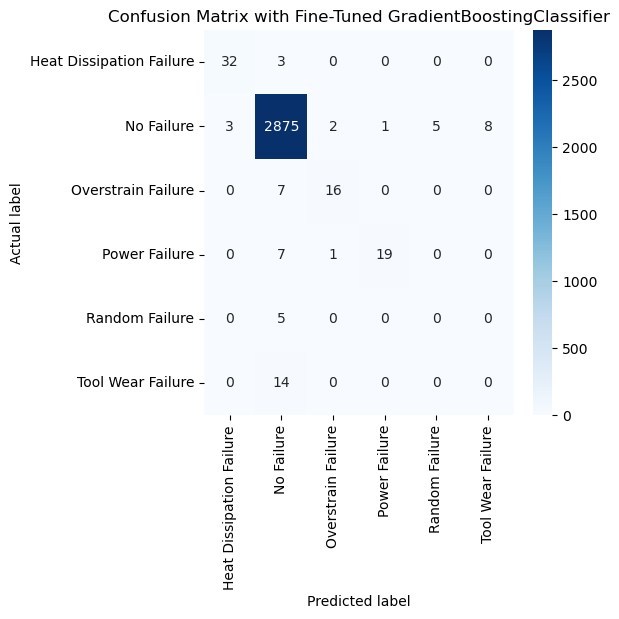

In [46]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5,5)) # Larger figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(Y_test),
            yticklabels=np.unique(Y_pred))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Fine-Tuned GradientBoostingClassifier')
plt.show()

In [48]:
with open('./model.pkl', 'wb') as model_file:
    pickle.dump(tuned_model, model_file)

Reference: https://medium.com/@thalesvignoli/end-to-end-data-science-project-for-maintenance-0cece417b314